Algoritmo de Grover #3: Pruebas en los Simuladores

Importamos todos los recursos requeridos de las librerías necesarias para desarrollar el trabajo.
Para luego ejecutarlo en cada uno de los simuladores determinados para este algoritmo:
    -FakeOpenPulse2Q
    -FakeOpenPulse3Q
    -FakeManila
    y uno adicional (de nuestra parte) para ejecutarlo como prueba primera.
A su vez, se utilizan las herramientas por defecto para armar los circuitos en Qiskit
y las herramientas de visualización.

In [1]:
import numpy as np
import math
import qiskit as qiskit
from numpy import sqrt
from random import randint
from qiskit import *
from qiskit import Aer, QuantumCircuit, IBMQ, execute, quantum_info, transpile
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor
from qiskit.providers.fake_provider import FakeOpenPulse2Q, FakeOpenPulse3Q, FakeManilaV2, FakeManila

provider = IBMQ.load_account()
print('se ha ejecutado correctamente')


se ha ejecutado correctamente


A continuación, se procede a armar el circuito cuántico 
definiendo el comportamiento del qubit. Así como las declaraciones (if, elif, else) 
establecidas al final que básicamente dependiendo el escenario
sucede una forma u otra en el circuito.
Podemos ver que en esta estructura a probar en los simuladores ya mencionados
denotamos que ya está incluido la definición final de la descripción del circuito
ya que agregamos el Glover_Iteration con sus determinadas compuertas y respectivos rangos.

In [2]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


A partir de las definiciones anteriores, por lo tanto podemos establecer 
la estructura visual del ciruito, tal como en el notebook anterior. Sabiendo que resultará:

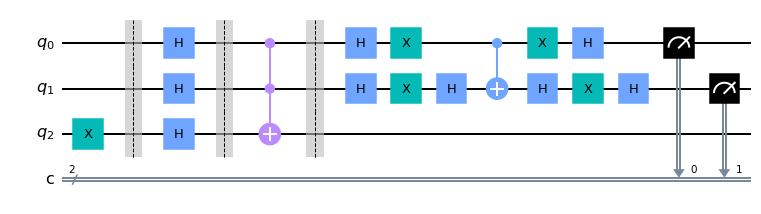

In [8]:
#Se añade el circ_measure, y el Grover_Iteration con rangos de registro
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

#Se define la variable circ
circ = QuantumCircuit(x_register+y_register,measure_register)
#Se describen las compuertas y barreras
circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')

Podemos obtener de esto el número de compuertas así como el valor de la profundidad del circuito:

In [9]:
circ.count_ops() #número de compuertas

OrderedDict([('h', 9),
             ('x', 5),
             ('barrier', 3),
             ('measure', 2),
             ('ccx', 1),
             ('cx', 1)])

In [10]:
circ.depth() #calcula la profundidad del circuito

11

En el notebook anterior se pueden ver los valores y la gráfica de este mismo circuito (el definitivo)
transpilado.

Dándole instrucciones a este circuito, podemos simularlo en el Aer_Simulator
el cual nos dará el estado correcto en el que debe dar el algoritmo de Grover.

In [21]:
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))
#nota: son las mismas instruccions expresadas a la hora de dar el resultado gráfico arriba, el circuito
#completamente estructurado.
#circ.draw('mpl') EN ESTE CASO NO LO UTILIZAREMOS solo daremos instrucciones al circuito
#circ.draw('mpl')

Procedemos a simularlo:

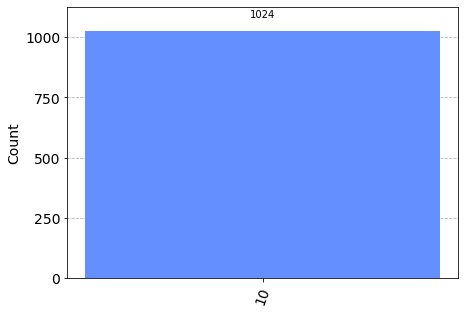

In [23]:
#simulación Aer Simulator
backend = Aer.get_backend('aer_simulator') #simulador a usar
job = execute(circ, backend, shots=1024) #descripción del trabajo
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts) #expresa los datos en un histograma

Dicho esto podemos ejecutarlo en los simuladores que mencionamos anteriormente,
obtendremos los gráficos de ambos circuitos y se transpilará,
calculando el número de compuertas y la profundidad del circuito en ambos casos.
Vamos a ello:

Haremos, la prueba primeramente en el simulador "FakeManilaV2"

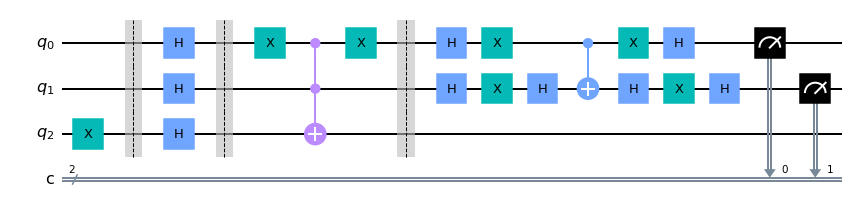

In [47]:
#Simulador de prueba FakeManilaV2
backend = FakeManilaV2() #la única diferencia es que ahora establecemos un backend determinado
#para el circuito a simular
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


Calculamos el número de compuertas y la profundidad (FakeManilaV2):

In [48]:
circ.count_ops()

OrderedDict([('h', 9),
             ('x', 7),
             ('barrier', 3),
             ('measure', 2),
             ('ccx', 1),
             ('cx', 1)])

In [49]:
circ.depth()

13

Transpilamos el circuito con el backend (FakeManilaV2)
y calculamos el número de compuertas y la profundidad:

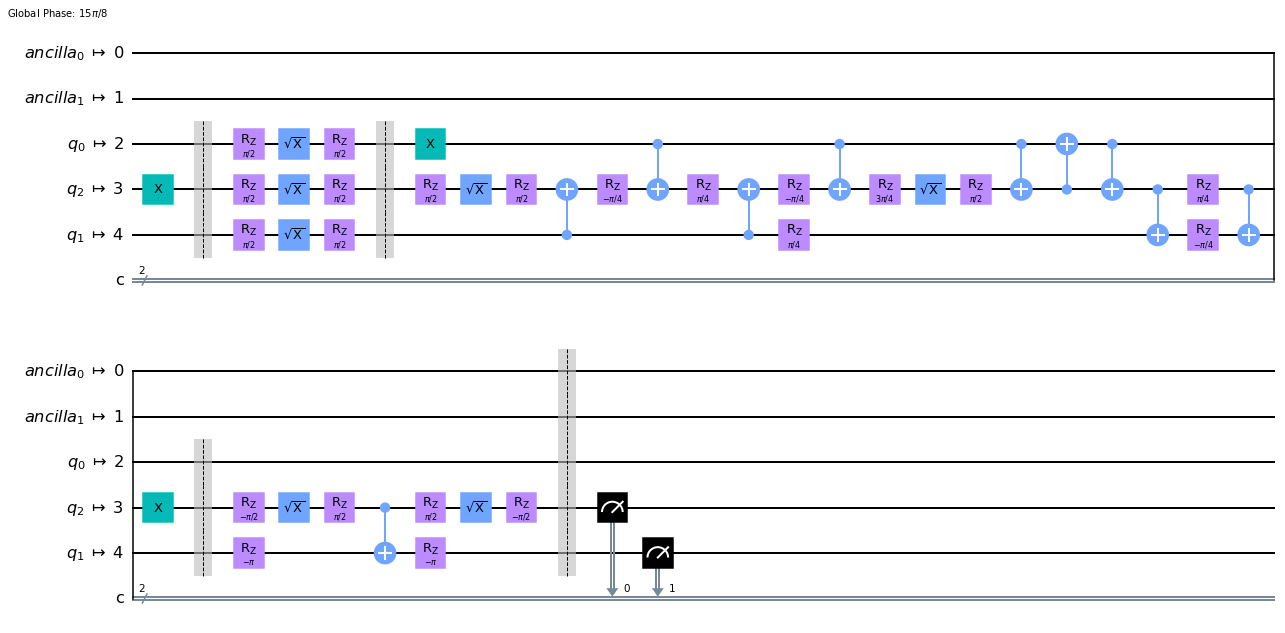

In [50]:
transpiled_circ = transpile(circ, backend)
transpiled_circ.draw()
#Resultados de transpilación con FakeManilaV2

In [51]:
transpiled_circ.count_ops()

OrderedDict([('rz', 22),
             ('cx', 10),
             ('sx', 7),
             ('barrier', 4),
             ('x', 3),
             ('measure', 2)])

In [52]:
transpiled_circ.depth()

32

Procedemos a utilizar el backend para simular el circuito que hemos transpilado (traducido)
de modo que:

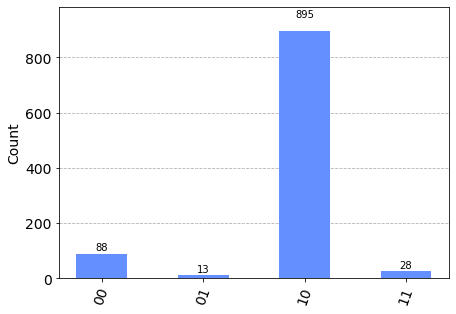

In [53]:
job = backend.run(transpiled_circ) #la variable establece la función de correr el backend = FakeManilaV2
counts = job.result().get_counts()
plot_histogram(counts) #analiza los datos a través del histograma
#Resultados de Simulación con FakeManilaV2

Como observamos, tenemos un poco de ruido.(Con el backend=FakeManilaV2)

De la misma forma que la simulación anterior procederemos con las tres simulaciones siguientes.

PRUEBA SIMULADOR "FAKEMANILA" backend = FakeManila

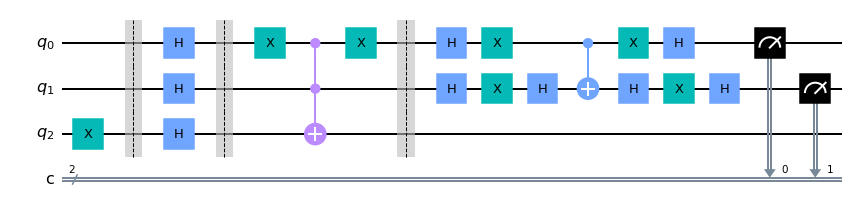

In [63]:
#Simulador de prueba FakeManila
backend = FakeManila() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


In [64]:
circ.count_ops()

OrderedDict([('h', 9),
             ('x', 7),
             ('barrier', 3),
             ('measure', 2),
             ('ccx', 1),
             ('cx', 1)])

In [65]:
circ.depth()

13

Transpilamos:

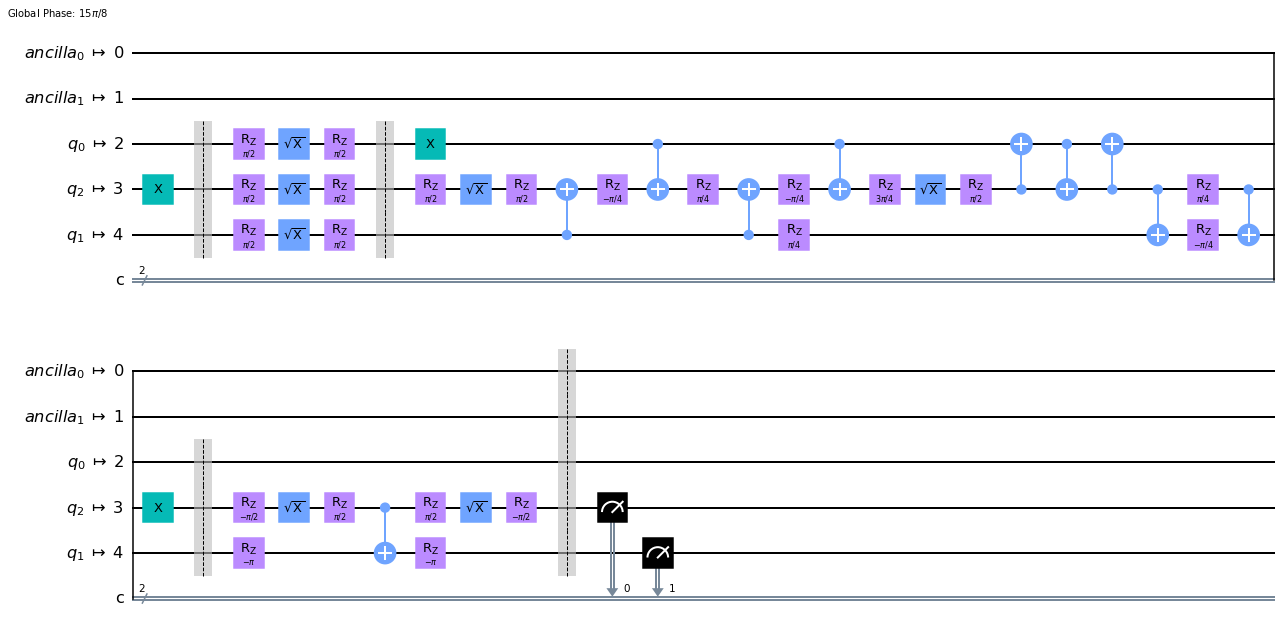

In [67]:
transpiled_circ = transpile(circ, backend)
transpiled_circ.draw()
#Resultados de transpilación con FakeManila

In [68]:
transpiled_circ.count_ops()

OrderedDict([('rz', 22),
             ('cx', 10),
             ('sx', 7),
             ('barrier', 4),
             ('x', 3),
             ('measure', 2)])

In [69]:
transpiled_circ.depth()

32

Simulamos:

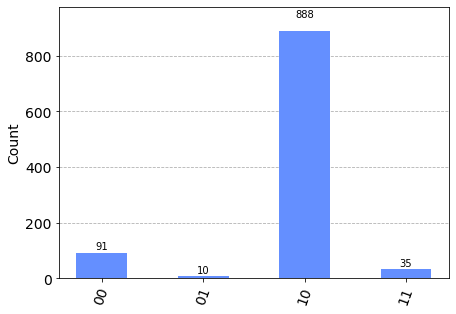

In [70]:
job = backend.run(transpiled_circ) #la variable establece la función de correr el backend = FakeManila
counts = job.result().get_counts()
plot_histogram(counts) #analiza los datos a través del histograma
#Resultados de Simulación con FakeManila

In [ ]:
Como observamos, tenemos un poco de ruido.(Con el backend=FakeManila)

PRUEBA SIMULADOR FAKEOPENPULSE2Q backend = FakeOpenPulse2Q 

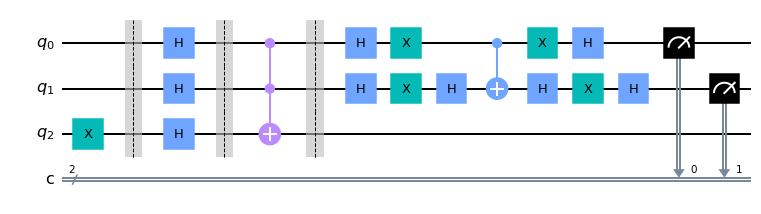

In [71]:
#Simulador de prueba FakeOpenPulse2Q
backend = FakeOpenPulse2Q()
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


In [72]:
circ.count_ops()

OrderedDict([('h', 9),
             ('x', 5),
             ('barrier', 3),
             ('measure', 2),
             ('ccx', 1),
             ('cx', 1)])

In [73]:
circ.depth()

11

Simulamos:

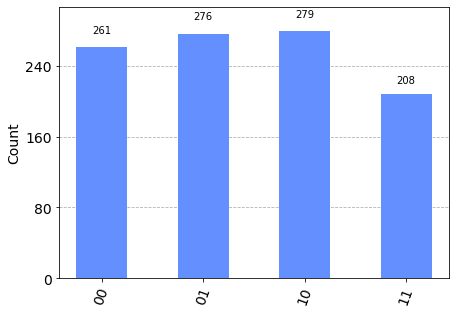

In [75]:
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)
#Resultados de Simulación con FakeOpenPulse2Q

In [ ]:
Como observamos, tenemos demasiado ruido en comparación
con las otras simulaciones.(Con el backend=FakeOpenPulse2Q)

PRUEBA SIMULADOR FAKEOPENPULSE3Q backend = FakeOpenPulse3Q

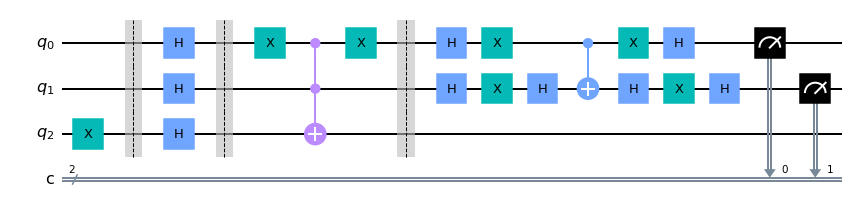

In [131]:
#Simulador de prueba FakeOpenPulse3Q
backend = FakeOpenPulse3Q()
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


In [132]:
circ.count_ops()

OrderedDict([('h', 9),
             ('x', 7),
             ('barrier', 3),
             ('measure', 2),
             ('ccx', 1),
             ('cx', 1)])

In [133]:
circ.depth()

13

Transpilamos:

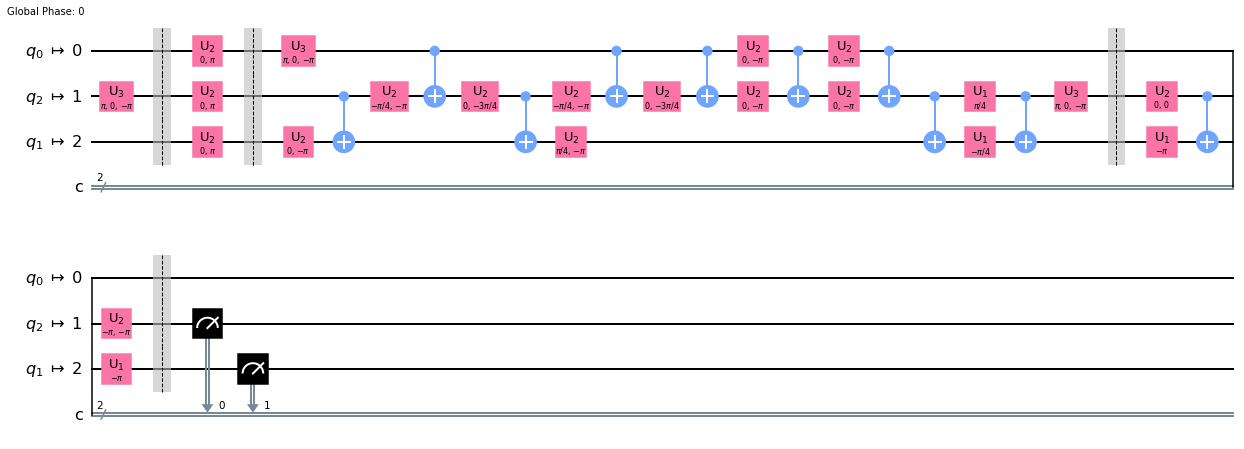

In [134]:
transpiled_circ = transpile(circ, backend)
transpiled_circ.draw()
#Resultados de transpilación con FakeOpenPulse3Q

In [135]:
transpiled_circ.count_ops()

OrderedDict([('u2', 15),
             ('cx', 10),
             ('barrier', 4),
             ('u1', 4),
             ('u3', 3),
             ('measure', 2)])

In [136]:
transpiled_circ.depth()

24

Simulamos:

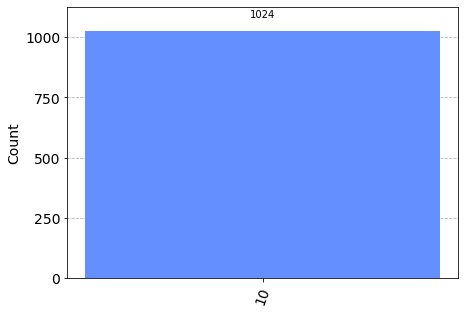

In [137]:
job = backend.run(transpiled_circ)
counts = job.result().get_counts()
plot_histogram(counts)
#Resultado de Simulación con FakeOpenPulse3Q

In [ ]:
En esta simulación, no poseemos ruido.(Con el backend=FakeOpenPulse3Q)